In [19]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU 
# SimpleRNN -> LSTM (계산이 너무 복잡) -> GRU (계산 간소화, LSTM 정도의 성능) 
from tensorflow.keras import Sequential
import pandas as pd

In [8]:
np.array([1,2,3]).shape

(3,)

In [13]:
x = np.array([[1,2,3],[2,3,4], [3,4,5], [4,5,6], [5,6,7], [6,7,8], [7,8,9], [10,11,12], [20,30,40], [30,40,50], [40,50,60]], np.float32)
y = np.array([4,5,6,7,8,9,10,13,50,60,70
             ])

In [14]:
x.shape

(11, 3)

In [15]:
model = Sequential()
model.add(SimpleRNN(32, activation = 'relu', input_shape = (3,1)))

model.add(Dense(units = 32))

model.add(Dense(units = 1))

model.compile(loss = 'mse', optimizer = 'adam')

model.fit(x, y, epochs = 500)

Epoch 1/500
1/1 [==============================] - 1s 756ms/step - loss: 1498.2644
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 1427.6511
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 1359.0438
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 1292.3685
Epoch 5/500
1/1 [==============================] - 0s 8ms/step - loss: 1227.5649
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 1164.5327
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 1103.0886
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 1043.1583
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 984.6897
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 927.6498
Epoch 11/500
1/1 [==============================] - 0s 0s/step - loss: 872.0151
Epoch 12/500
1/1 [==============================] - 0s 3ms/step - loss: 817.7830
Epoch 13/500
1/1 [========

In [16]:
model.predict(np.array([55,65,75]).reshape(1,3,1))

1/1 [==============================] - 0s 127ms/step


array([[86.15267]], dtype=float32)

In [26]:
model.predict(np.array([98,99,100]).reshape(1,3,1))

1/1 [==============================] - 0s 32ms/step


array([[105.787605]], dtype=float32)

In [87]:
airdf = pd.read_csv('./data/international-airline-passengers.txt')
airdf

,time,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [88]:
import matplotlib.pyplot as plt

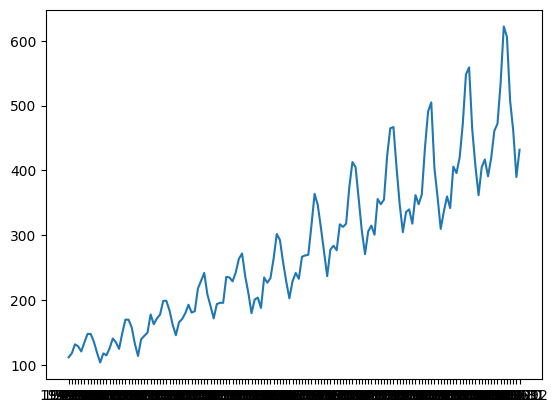

In [89]:
plt.plot(airdf['time'], airdf['passengers'])
plt.show()

In [90]:
### 3개의 타입스텝, 예측값은 3개
### RNN으로 학습
### 461, 390, 432명 다음 2개(2개월 승객)이 승객을 예측하시오

In [91]:
airdf

,time,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [94]:
def split_xy2(dataset, time_steps, y_column):
    x, y = list(), list()
    for i in range(len(dataset)):
        x_end_number = i + time_steps
        y_end_number = x_end_number + y_column # 추가
        # if end_number > len(dataset) -1:
        # break
        if y_end_number > len(dataset): # 수정
            break
        tmp_x = dataset[i : x_end_number]
        tmp_y = dataset[x_end_number : y_end_number] # 수정
        x.append(tmp_x)
        y.append(tmp_y)
    return np.array(x), np.array(y)

In [95]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [96]:
scaler = StandardScaler()
scaler_pass = scaler.fit_transform(airdf['passengers'].values.reshape(-1, 1))

In [97]:
x_data, y_data = split_xy2(scaler_pass.reshape(-1), 3, 3)

In [100]:
x_data.shape

(139, 3)

In [101]:
y_data.shape

(139, 3)

In [62]:
x_dataR = x_data.reshape(-1,3,1)
x_dataR.shape

(139, 3, 1)

In [103]:
x_dataR.shape

(139, 3, 1)

In [104]:
y_data.shape

(139, 3)

In [64]:
model = Sequential()
model.add(SimpleRNN(16, activation = 'relu', input_shape = (3,1)))
model.add(Dense(units = 32))
model.add(Dense(units = 16))
model.add(Dense(units = 3))
model.compile(loss = 'mse', optimizer = 'adam')
model.fit(x_dataR, y_data, epochs = 500)

Epoch 1/500
5/5 [==============================] - 1s 3ms/step - loss: 1.3304
Epoch 2/500
5/5 [==============================] - 0s 4ms/step - loss: 1.0730
Epoch 3/500
5/5 [==============================] - 0s 5ms/step - loss: 0.8896
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7249
Epoch 5/500
5/5 [==============================] - 0s 4ms/step - loss: 0.5921
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 0.4704
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3582
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2819
Epoch 9/500
5/5 [==============================] - 0s 4ms/step - loss: 0.2247
Epoch 10/500
5/5 [==============================] - 0s 4ms/step - loss: 0.2035
Epoch 11/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2000
Epoch 12/500
5/5 [==============================] - 0s 4ms/step - loss: 0.1967
Epoch 13/500
5/5 [==============================] - 0s 3ms/st

In [105]:
s = scaler.transform([[461],[390],[432]])
s.shape

(3, 1)

In [71]:
s = scaler.transform([[461],[390],[432]])
pred = model.predict(s.reshape(1,3,1))

1/1 [==============================] - 0s 30ms/step


In [74]:
pred = scaler.inverse_transform(pred)

In [78]:
airdf = pd.read_csv('./data/international-airline-passengers.txt', index_col = 'time')
airdf

,passengers
time,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [80]:
predDF = pd.DataFrame(pred)
predDF = predDF.T
predDF.index = ['1961-01', '1961-02', '1961-03']

In [81]:
predDF

,0
1961-01,434.660187
1961-02,433.886993
1961-03,473.236145


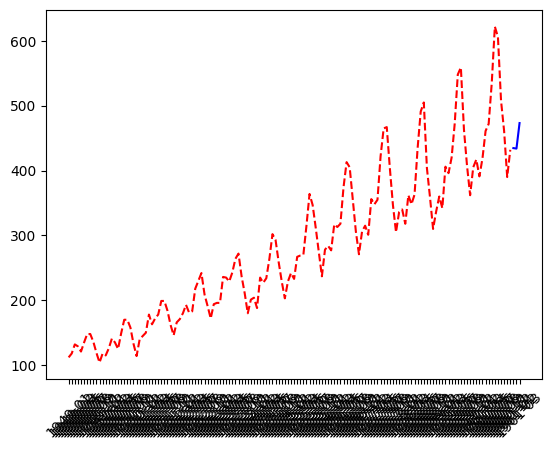

In [83]:
plt.xticks(rotation = 45)
plt.plot(airdf['passengers'], 'r--')
plt.plot(predDF, 'b-')
plt.show()

In [ ]:
# - 머신러닝 : arima, XGBoost, LightGBM
# - 딥러닝 : RNN
# - NeuralProphet : arima, rnn

In [44]:
for i in range(airdf.shape[0]) :
    airdf['year'] = airdf.time.str.split('-')[i][0]
    airdf['month'] = airdf.time.str.split('-')[i][1]

In [49]:
x = np.array([airdf] np.float32)
y = np.array([airdf.passengers])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3551848833.py, line 1)

In [37]:
y.shape

(1, 144)

In [ ]:
model = Sequential()
model.add(SimpleRNN(32, activation = 'relu', input_shape = (3,1)))

model.add(Dense(units = 32))

model.add(Dense(units = 1))

model.compile(loss = 'mse', optimizer = 'adam')

model.fit(x, y, epochs = 500)